# Libraries used

Running Kernel3.9.13 base anaconda

pip install squarify
pip install yellowbrick
pip install plotly
pip install seaborn
pip install lazypredict
pip install pandas_profiling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
import plotly.io as pio
#import squarify #treemap
import os
import matplotlib
import warnings



#to enable the inline plotting
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

In [41]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.stats import normaltest

from pandas_profiling import ProfileReport

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette

import lazypredict
from lazypredict.Supervised import LazyClassifier


warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Function for EDA. Using the display() function to have  well-formatted tables. We are mainly using pandas to explore the datasets

def dataset_description(df_target):

    print('This is the Dataset shape: %s\n' % (df_target.shape, ))
    print('Dataset columns: %s\n' % df_target.columns)

    print('\nColumns description:\n')
    display(df_target.info())
    display(df_target.describe())  # describe the dataset

    print('\nNull values:\n')
    display(df_target.isnull().sum())  # Identify null values

#function performing a quick check on df_inspection to have best of pandas functions separated by a line
def quick_check(dataframe):
    print('First 5 rows %s\n')
    print(dataframe.head(2))
    print("=====================================")
    print('Dataframe shape %s\n')
    print(dataframe.shape)
    print("=====================================")
    print('Dataframe describe categorical %s\n')
    print(dataframe.describe(include=['O']))
    print("=====================================")
    print('Dataframe null values %s\n')
    print(dataframe.isnull().sum())
    print("=====================================")
    print('Dataframe value counts %s\n')
    print(dataframe.value_counts())
    print("=====================================")

#stats function
def stats(dataframe):
    print('Dataframe correlation %s\n')
    print(dataframe.corr())
    print("=====================================")
    print('Dataframe covariance %s\n')
    print(dataframe.cov())
    print("=====================================")
    print('Dataframe skew %s\n')
    print(dataframe.skew())
    print("=====================================")
    print('Dataframe kurtosis %s\n')
    print(dataframe.kurt())
    print("=====================================")

#create a function to normalize characters from a dataset's column in Spanish
def normalize_characters(df, column):
    df[column] = df[column].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace('á', 'a')
    df[column] = df[column].str.replace('é', 'e')
    df[column] = df[column].str.replace('í', 'i')
    df[column] = df[column].str.replace('ó', 'o')
    df[column] = df[column].str.replace('ú', 'u')
    df[column] = df[column].str.replace('ñ', 'n')
    df[column] = df[column].str.replace('ü', 'u')
    df[column] = df[column].str.replace('ç', 'c')
    df[column] = df[column].str.replace('(', '')
    df[column] = df[column].str.replace(')', '')
    df[column] = df[column].str.replace('\'', '')
    df[column] = df[column].str.replace('´', '')
    df[column] = df[column].str.replace('`', '')
    df[column] = df[column].str.replace('’', '')
    return df.head(2)

#create function to change detypes in64 to int32 in a df
def change_dtypes(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
        elif df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
    return df

def outlier_function(df, col_name):
    """ this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively"""
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                        
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                    
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
        else:
            pass
    return lower_limit, upper_limit, outlier_count

In [4]:
#show all print outputs when using a function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#display all columns
pd.set_option('display.max_columns', None)


# Importing previous dataset

In [5]:
#point to the folder where the data is stored
os.chdir(r"C:\Users\pedro\datathon")

# Loading combined_mod dataset
train_consolidated = pd.read_csv('train_consolidated_weather.csv')



#pandas profiling report for train_consolidated exporting a file
profile = ProfileReport(train_consolidated, title='Pandas Profiling Report', explorative=True)
profile.to_file("train_consolidated.html")


In [6]:
train_consolidated.head(1)

,PipeId,No_Inspections,No_Incidents,InspectionYear,Probability_rate,preventive_maintenance_rate,Age_pipe_at_inspection,pipe_inspected_frequently,Average_MonthsLastRev,MonthsLastRev,relative_risk,average_severity_pipe,Incidence,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,area_connection,incidence_area,connection_bool,Severity_high,Severity_medium,Severity_low,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),Province,Town
0,489616,5,0.00,2013.00,0.00,0.00,1.00,1,21.40,16.00,0.00,4.00,0.00,2012,0.06,7.79,0.40,0,0,0,0.81,0.16,1.54,0.00,0.00,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,15.44,1.50,33.70,438,0.55,52,107.50,ciudad real,torralba de calatrava


In [7]:
#creating a subset for altering the dataset after initial EDA
df_baseline = train_consolidated.copy()


In [8]:
df_baseline.head(1)

,PipeId,No_Inspections,No_Incidents,InspectionYear,Probability_rate,preventive_maintenance_rate,Age_pipe_at_inspection,pipe_inspected_frequently,Average_MonthsLastRev,MonthsLastRev,relative_risk,average_severity_pipe,Incidence,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,area_connection,incidence_area,connection_bool,Severity_high,Severity_medium,Severity_low,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),Province,Town
0,489616,5,0.00,2013.00,0.00,0.00,1.00,1,21.40,16.00,0.00,4.00,0.00,2012,0.06,7.79,0.40,0,0,0,0.81,0.16,1.54,0.00,0.00,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,15.44,1.50,33.70,438,0.55,52,107.50,ciudad real,torralba de calatrava


In [9]:
df_baseline.columns

Index(['PipeId', 'No_Inspections', 'No_Incidents', 'InspectionYear',
       'Probability_rate', 'preventive_maintenance_rate',
       'Age_pipe_at_inspection', 'pipe_inspected_frequently',
       'Average_MonthsLastRev', 'MonthsLastRev', 'relative_risk',
       'average_severity_pipe', 'Incidence', 'YearBuilt', 'Diameter', 'Length',
       'Pressure', 'NumConnections', 'NumConnectionsUnder', 'BoolBridle',
       'aspect', 'Relative_Thickness', 'pipe_area', 'area_connection',
       'incidence_area', 'connection_bool', 'Severity_high', 'Severity_medium',
       'Severity_low', 'gas_natural',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass-Reinforced Plastic', 'Material_Polyethylene',
       'Material_Polypropylene', 'Diameter2', 'Length2', 'Pressure2',
       'Average yearly temperature (°C)', 'Min. Temperature (°C)',
       'Max. Temperature (°C)', 'Yearly Rainfall (mm)',
       'Average year Humidity (%)', 'Rainy days per year (days)',

In [10]:
#min max of Pressure in df_baseline
df_baseline['Pressure'].min()
df_baseline['Pressure'].max()



0.025

80.0

<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='Pressure'>

Text(0.5, 1.0, 'Pressure distribution')

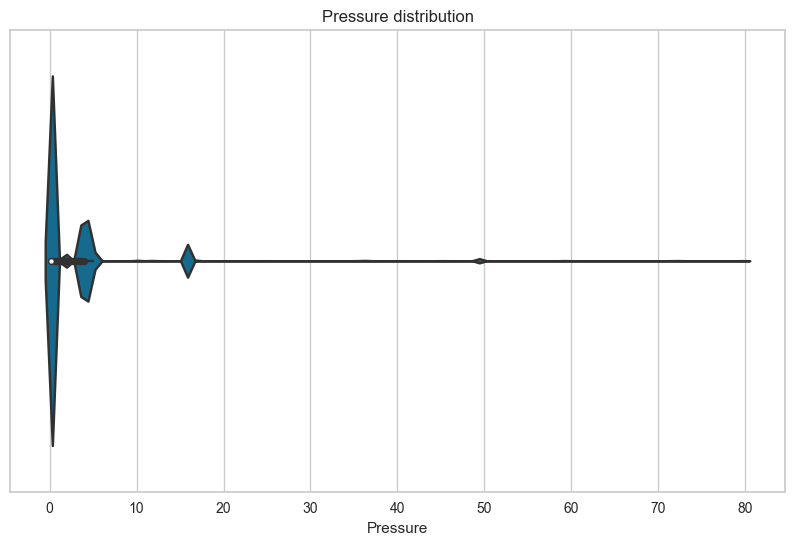

In [11]:
#plot pressure distribution with a violin plo
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pressure', data=df_baseline)
plt.title('Pressure distribution')
plt.show()


In [12]:
#delete outliers higher than 20 in Pressure for df_baseline
df_baseline = df_baseline[df_baseline['Pressure'] < 20]



<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='Average_MonthsLastRev'>

Text(0.5, 1.0, 'Average_MonthsLastRev for Pressure< 5')

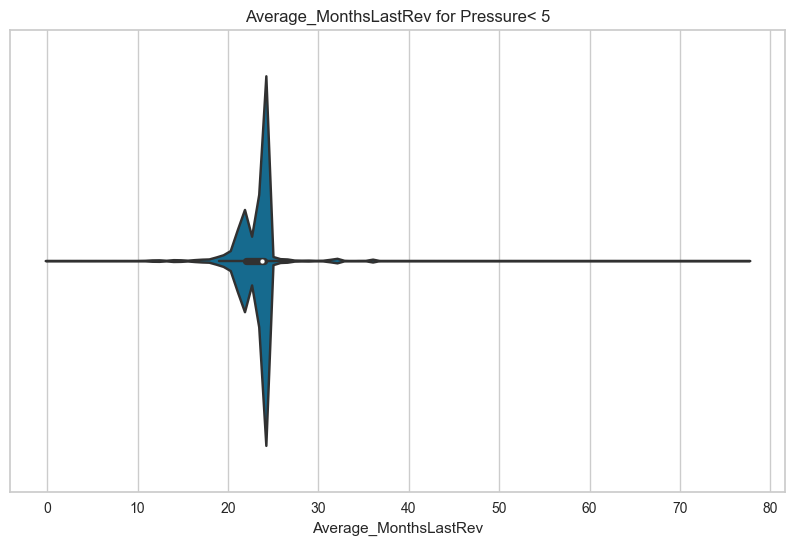

In [13]:
#plot Average_MonthsLastRev for Pressure > 16 and plot it
plt.figure(figsize=(10, 6))
sns.violinplot(x='Average_MonthsLastRev', data=df_baseline[df_baseline['Pressure'] < 5])
plt.title('Average_MonthsLastRev for Pressure< 5')
plt.show()




<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='Average_MonthsLastRev', ylabel='Pressure'>

Text(0.5, 1.0, 'Average_MonthsLastRev and Pressure')

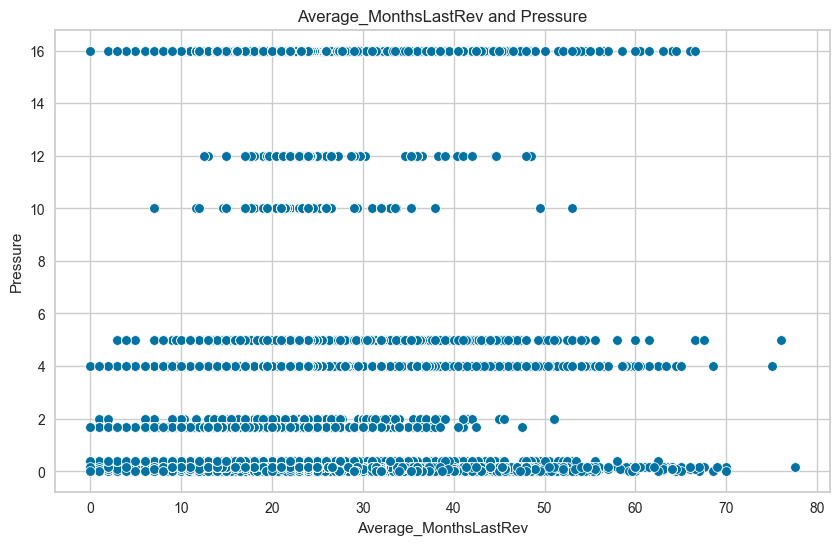

In [14]:
#plot Average_MonthsLastRev and Pressure in seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_MonthsLastRev', y='Pressure', data=df_baseline)
plt.title('Average_MonthsLastRev and Pressure')
plt.show()



# Merging another dataset

In [18]:
#point to the folder where the data is stored for Pedro
os.chdir(r"C:\Users\pedro\datathon\base\complementary_datasets")

#Loading sample_submission
density = pd.read_excel('population_density_province.xlsx' )

In [19]:
density.head(1)

,Province,Area (sq km),Year,Population,Population density (persons/sqkm)
0,Albacete,14926,2022,385727,25.84


In [20]:
normalize_characters(density, 'Province')

,Province,Area (sq km),Year,Population,Population density (persons/sqkm)
0,albacete,14926,2022,385727,25.84
1,albacete,14926,2021,386464,25.89


In [21]:
#join density to df_baseline on Province taking only rows with year 2020
df_baseline = df_baseline.merge(density[density['Year'] == 2020], on='Province', how='left')
df_baseline.head(1)

,PipeId,No_Inspections,No_Incidents,InspectionYear,Probability_rate,preventive_maintenance_rate,Age_pipe_at_inspection,pipe_inspected_frequently,Average_MonthsLastRev,MonthsLastRev,relative_risk,average_severity_pipe,Incidence,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,area_connection,incidence_area,connection_bool,Severity_high,Severity_medium,Severity_low,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),Province,Town,Area (sq km),Year,Population,Population density (persons/sqkm)
0,489616,5,0.00,2013.00,0.00,0.00,1.00,1,21.40,16.00,0.00,4.00,0.00,2012,0.06,7.79,0.40,0,0,0,0.81,0.16,1.54,0.00,0.00,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,15.44,1.50,33.70,438,0.55,52,107.50,ciudad real,torralba de calatrava,19813,2020,495045,24.99


In [22]:
#compare array for column Province in density and df_baseline and compute set difference
np.setdiff1d(density['Province'].unique(), df_baseline['Province'].unique())


array([], dtype=object)

# Deleting more columns before PCA based on correlation

In [23]:
df_baseline.columns

Index(['PipeId', 'No_Inspections', 'No_Incidents', 'InspectionYear',
       'Probability_rate', 'preventive_maintenance_rate',
       'Age_pipe_at_inspection', 'pipe_inspected_frequently',
       'Average_MonthsLastRev', 'MonthsLastRev', 'relative_risk',
       'average_severity_pipe', 'Incidence', 'YearBuilt', 'Diameter', 'Length',
       'Pressure', 'NumConnections', 'NumConnectionsUnder', 'BoolBridle',
       'aspect', 'Relative_Thickness', 'pipe_area', 'area_connection',
       'incidence_area', 'connection_bool', 'Severity_high', 'Severity_medium',
       'Severity_low', 'gas_natural',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass-Reinforced Plastic', 'Material_Polyethylene',
       'Material_Polypropylene', 'Diameter2', 'Length2', 'Pressure2',
       'Average yearly temperature (°C)', 'Min. Temperature (°C)',
       'Max. Temperature (°C)', 'Yearly Rainfall (mm)',
       'Average year Humidity (%)', 'Rainy days per year (days)',

In [26]:
#delete columns 'Probability_rate', 'preventive_maintenance_rate', 'relative_risk','average_severity_pipe', 'Severity_high', 'Severity_medium', 'Severity_low' from df_baseline
df_baseline.drop(['Probability_rate', 'Population','YearBuilt', 'relative_risk',
       'average_severity_pipe', 'Severity_high', 'Severity_medium', 'Diameter', 'Length',
       'Pressure', 'aspect', 'Severity_low', 'Province', 'Town', 'Area (sq km)', 'Year', 
       'Average yearly temperature (°C)', 'Min. Temperature (°C)','Yearly Rainfall (mm)', 
       'Rainy days per year (days)', 'Max. Temperature (°C)'], axis=1, inplace=True)


<Figure size 2000x2000 with 0 Axes>

<AxesSubplot: >

Text(0.5, 1.0, 'Correlation matrix')

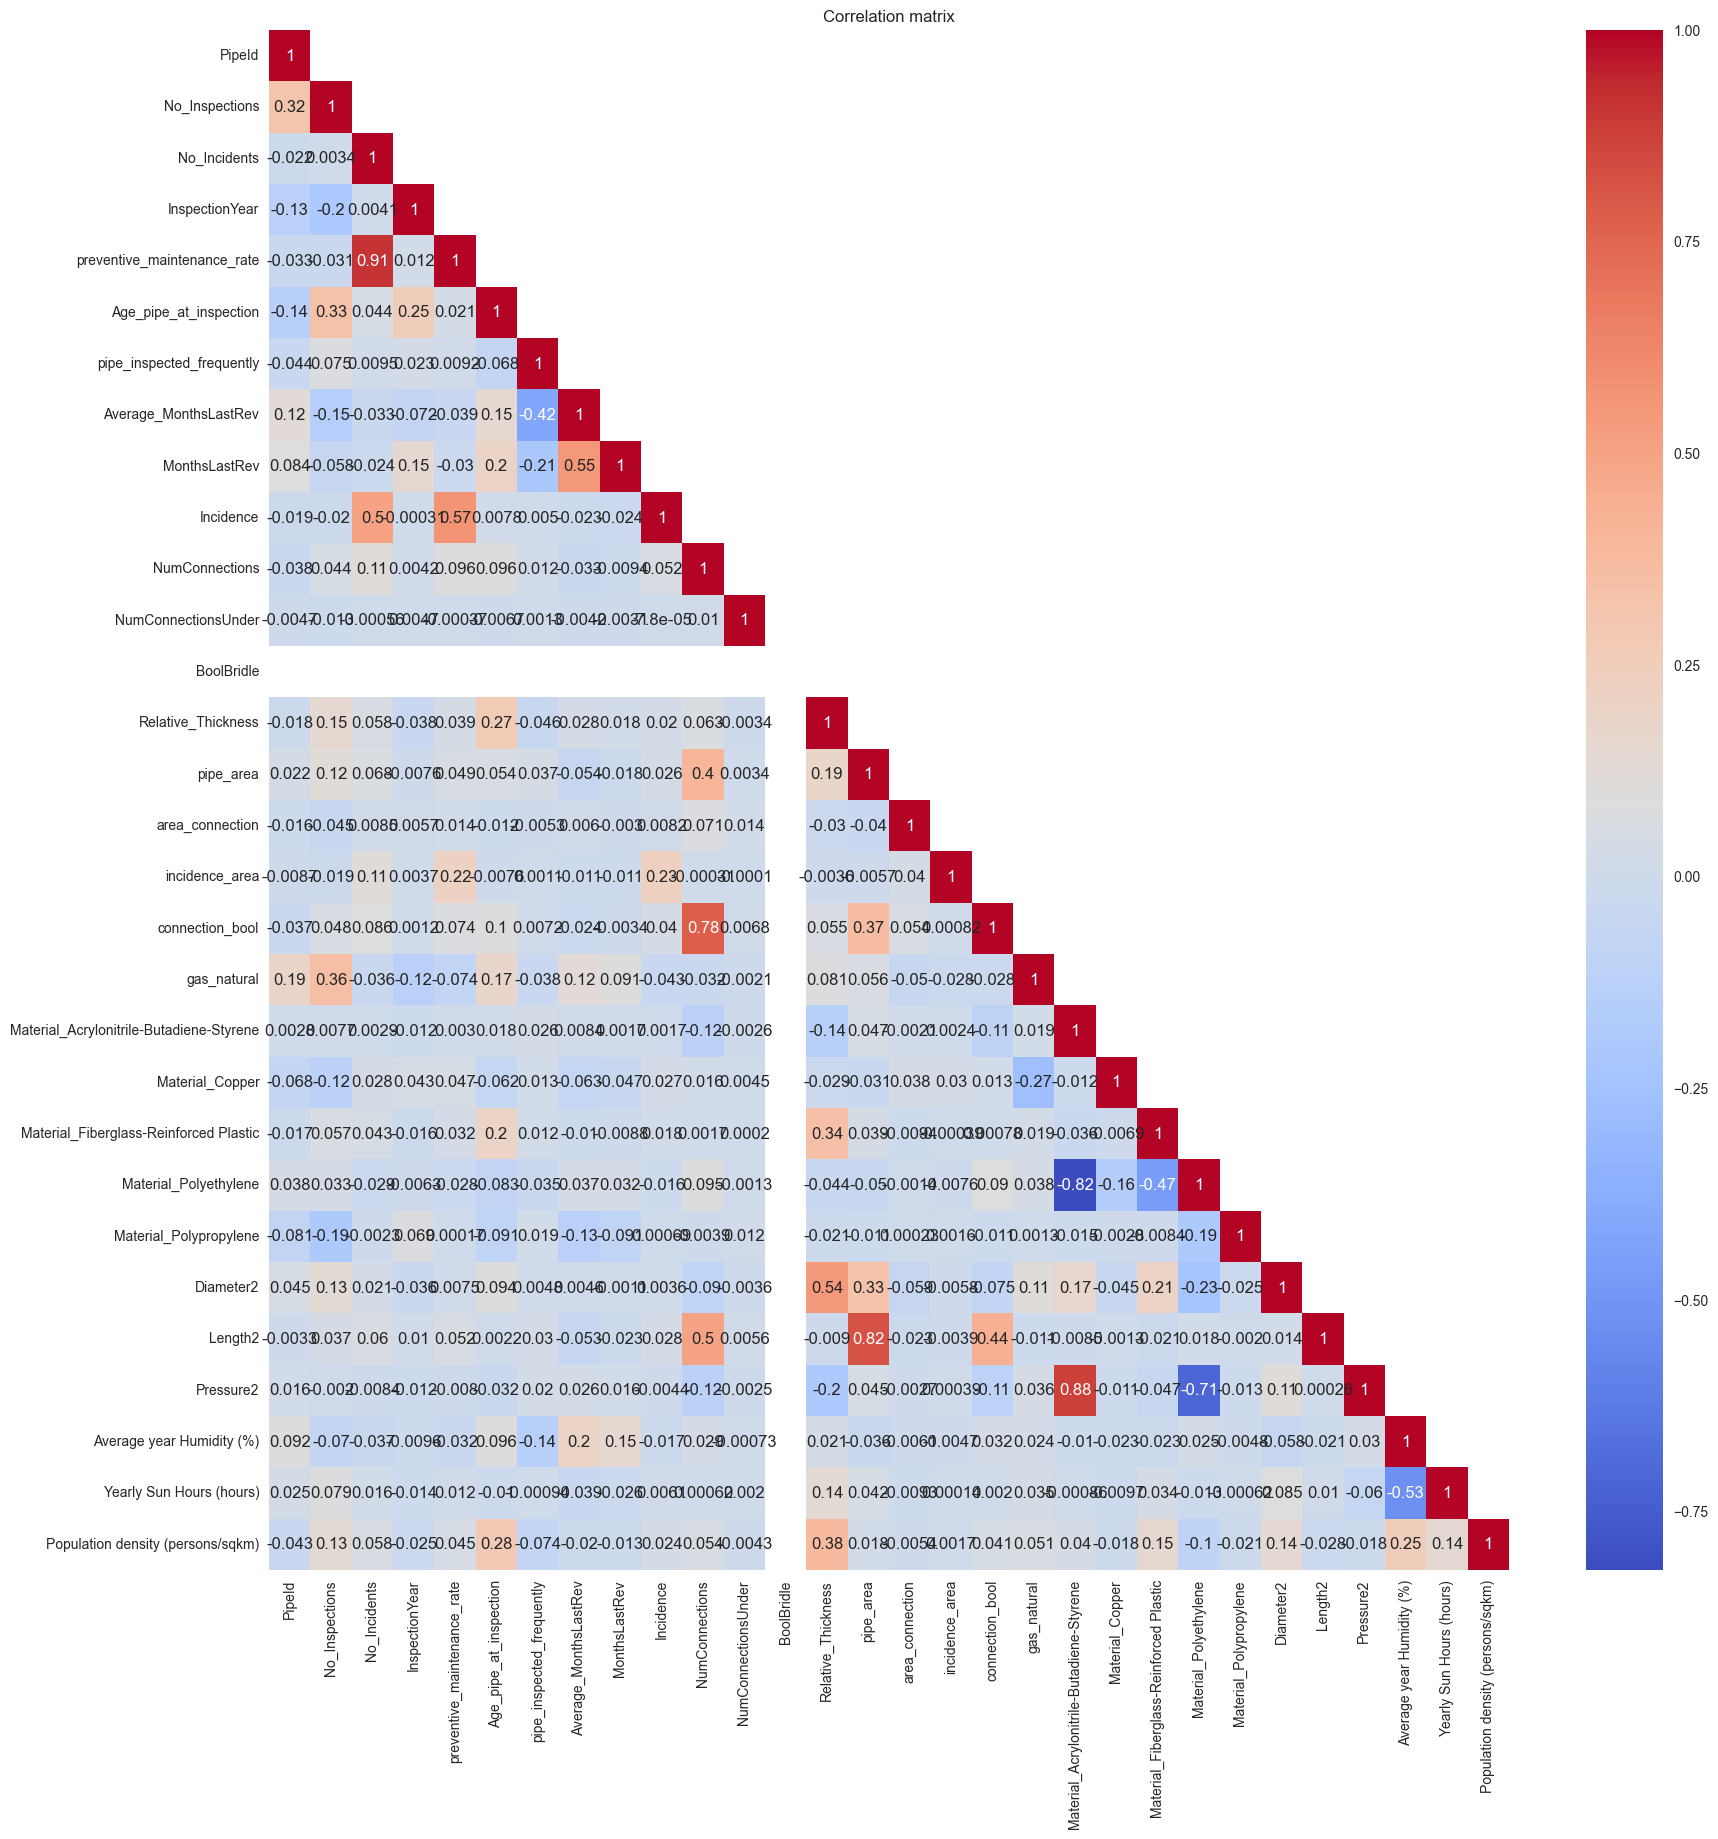

In [28]:
#graph correlation matrix for df_baseline colouring values above 0.7 and exporting it to a png file
corr = df_baseline.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=np.triu(corr, k=1))
plt.title('Correlation matrix')
plt.savefig('correlation_matrix.png')
plt.show()


In [38]:
#show values for BoolBridle in df_baseline
df_baseline['BoolBridle'].value_counts()

0    5446331
Name: BoolBridle, dtype: int64

In [39]:
#drop BoolBridle from df_baseline
df_baseline.drop('BoolBridle', axis=1, inplace=True)


# Performing dimensionality reduction

PCA(n_components=14)

array([1.00000000e+00, 3.46905801e-10, 7.62606464e-12, 2.16515150e-13,
       6.77038041e-15, 3.99507879e-15, 2.96503447e-15, 8.25423908e-16,
       6.08602560e-16, 3.30444545e-16, 2.88411753e-16, 2.10595096e-16,
       1.28735483e-16, 4.71856509e-17])

<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='pca1', ylabel='pca2'>

Text(0.5, 1.0, 'PCA1 and PCA2')

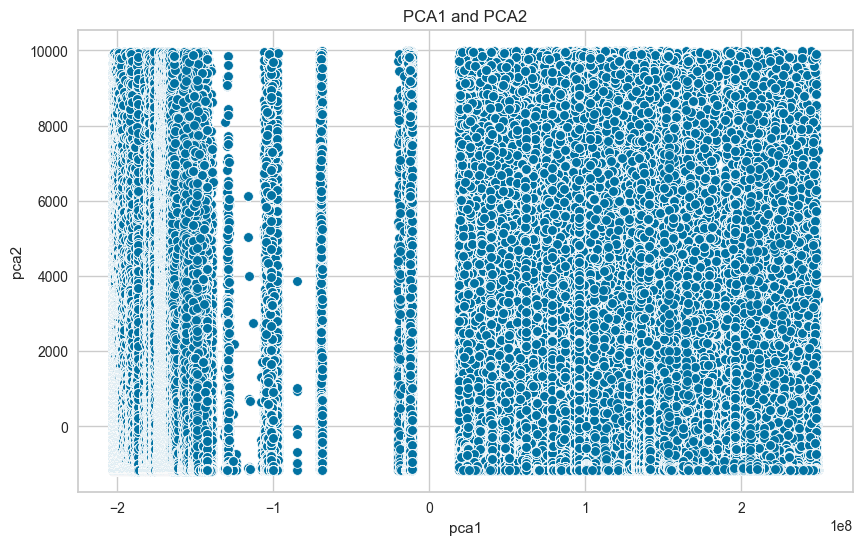

In [42]:
#perform pca on df_baseline with 14 n components and plot the explained variance ratio returning a new df with the pca components
pca = PCA(n_components=14)
pca.fit(df_baseline)
pca.explained_variance_ratio_
pca_df = pd.DataFrame(pca.transform(df_baseline), columns=['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14'])

#plot pca_df
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', data=pca_df)
plt.title('PCA1 and PCA2')
plt.show()


<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='pca3', ylabel='pca4'>

Text(0.5, 1.0, 'PCA3 and PCA4')

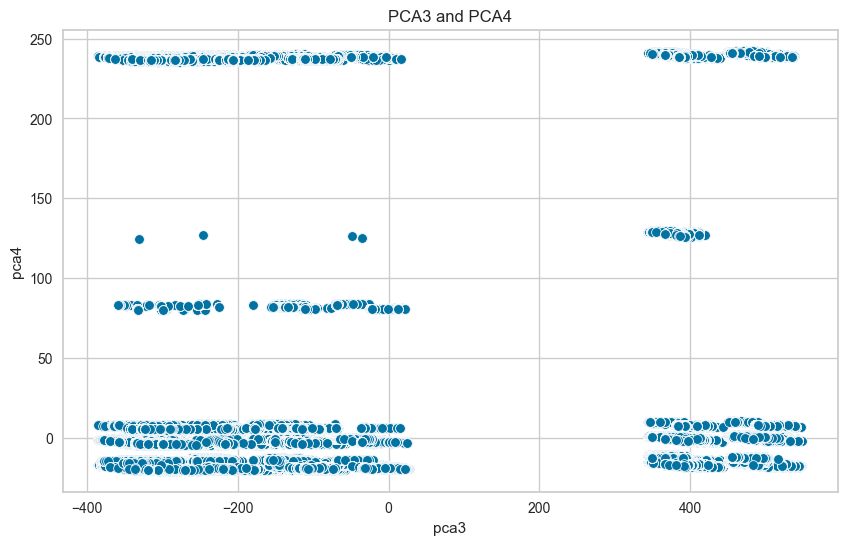

In [43]:

#plot pca_df
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca3', y='pca4', data=pca_df)
plt.title('PCA3 and PCA4')
plt.show()


<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='pca5', ylabel='pca6'>

Text(0.5, 1.0, 'PCA5 and PCA6')

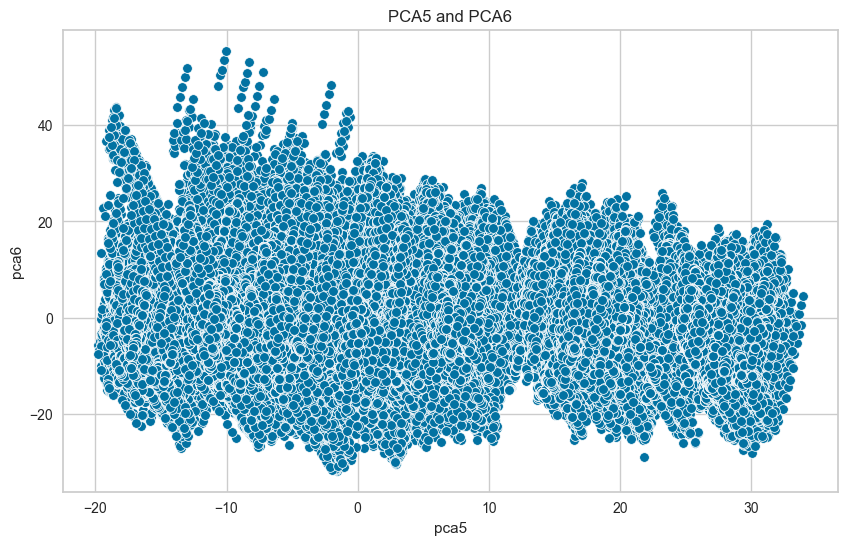

In [44]:

#plot pca_df
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca5', y='pca6', data=pca_df)
plt.title('PCA5 and PCA6')
plt.show()


<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='pca7', ylabel='pca8'>

Text(0.5, 1.0, 'PCA7 and PCA8')

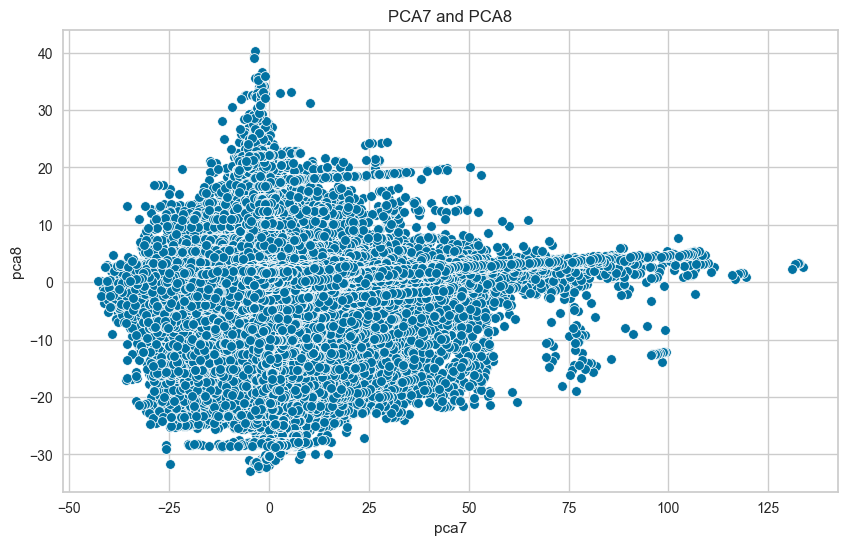

In [45]:

#plot pca_df
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca7', y='pca8', data=pca_df)
plt.title('PCA7 and PCA8')
plt.show()


<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='pca9', ylabel='pca10'>

Text(0.5, 1.0, 'PCA9 and PCA10')

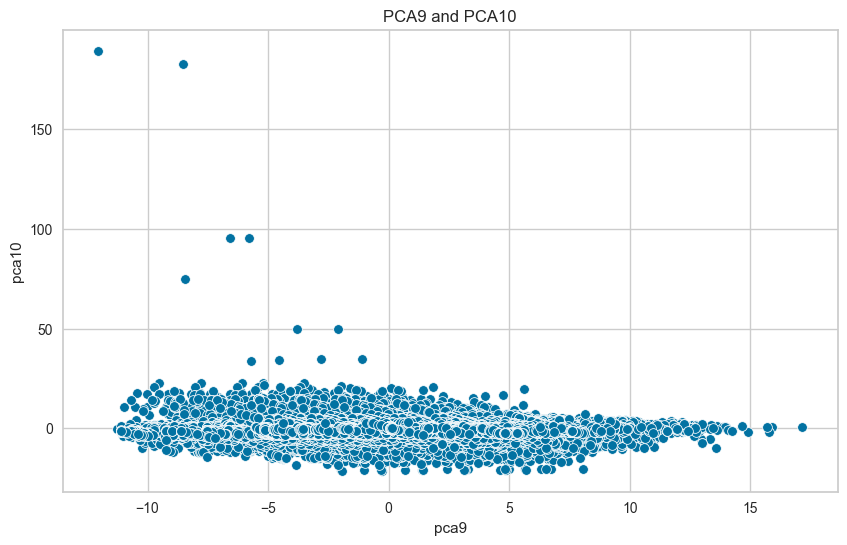

In [46]:

#plot pca_df
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca9', y='pca10', data=pca_df)
plt.title('PCA9 and PCA10')
plt.show()


<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='pca11', ylabel='pca12'>

Text(0.5, 1.0, 'PCA11 and PCA12')

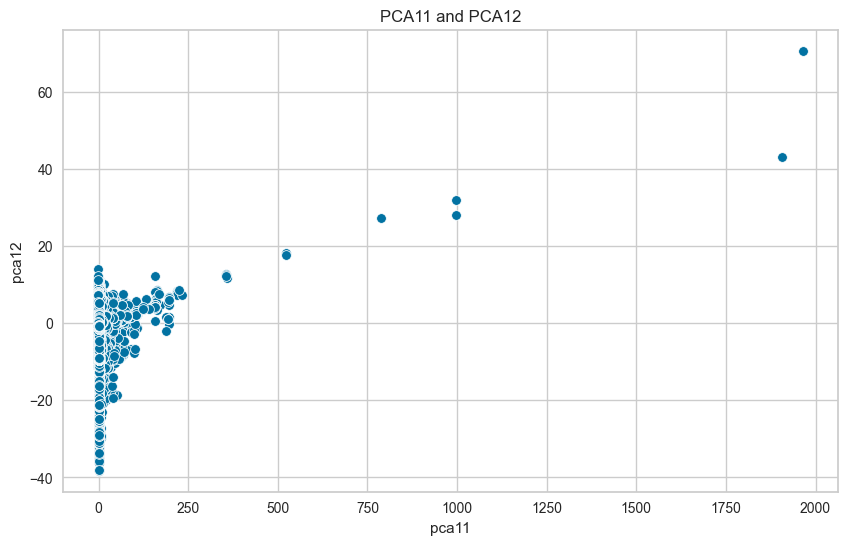

In [47]:

#plot pca_df
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca11', y='pca12', data=pca_df)
plt.title('PCA11 and PCA12')
plt.show()


<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='pca13', ylabel='pca14'>

Text(0.5, 1.0, 'PCA13 and PCA14')

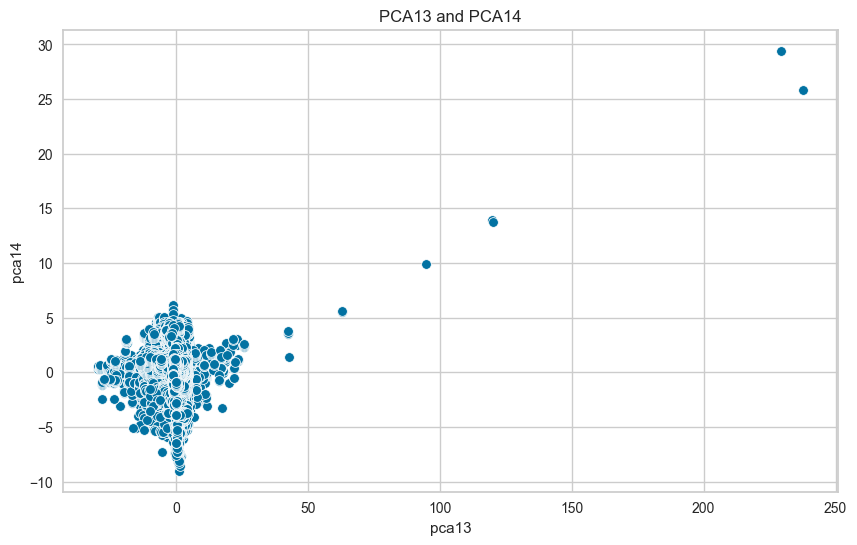

In [48]:

#plot pca_df
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca13', y='pca14', data=pca_df)
plt.title('PCA13 and PCA14')
plt.show()


In [50]:
pca_df.head(1)

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14
0,-202516151.71,-1113.84,-369.45,-16.94,-5.26,-11.91,2.89,-4.89,1.80,0.03,-0.29,-1.67,0.22,1.21


In [51]:
#exporting df_baseline to csv
df_baseline.to_csv('df_baseline.csv', index=False)


In [53]:
#pandas profiling report for df_baseline
profile = ProfileReport(df_baseline, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_file('df_baseline.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Pre-Processing

Machine Learning algorithms don't perform well when the input numerical attributes have very different scales. Since we have very skewed data, __standardization__ is much less affected by outliers and it is the one we will choose __instead of normalization__.


In [54]:
df_baseline.columns

Index(['PipeId', 'No_Inspections', 'No_Incidents', 'InspectionYear',
       'preventive_maintenance_rate', 'Age_pipe_at_inspection',
       'pipe_inspected_frequently', 'Average_MonthsLastRev', 'MonthsLastRev',
       'Incidence', 'NumConnections', 'NumConnectionsUnder',
       'Relative_Thickness', 'pipe_area', 'area_connection', 'incidence_area',
       'connection_bool', 'gas_natural',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass-Reinforced Plastic', 'Material_Polyethylene',
       'Material_Polypropylene', 'Diameter2', 'Length2', 'Pressure2',
       'Average year Humidity (%)', 'Yearly Sun Hours (hours)',
       'Population density (persons/sqkm)'],
      dtype='object')

In [55]:
df_baseline.dtypes

PipeId                                        int64
No_Inspections                                int64
No_Incidents                                float64
InspectionYear                              float64
preventive_maintenance_rate                 float64
Age_pipe_at_inspection                      float64
pipe_inspected_frequently                     int64
Average_MonthsLastRev                       float64
MonthsLastRev                               float64
Incidence                                   float64
NumConnections                                int64
NumConnectionsUnder                           int64
Relative_Thickness                          float64
pipe_area                                   float64
area_connection                             float64
incidence_area                              float64
connection_bool                               int64
gas_natural                                   int64
Material_Acrylonitrile-Butadiene-Styrene      int64
Material_Cop

In [56]:
#count values for Incidence
df_baseline['Incidence'].value_counts()


0.00    5438615
1.00       7716
Name: Incidence, dtype: int64

# Stratifying while undersampling


In [58]:
#undersampling the dataset
df_baseline_undersampling = df_baseline.groupby('Incidence').apply(lambda x: x.sample(df_baseline['Incidence'].value_counts().min(), random_state=42)).reset_index(drop=True)

df_baseline_undersampling['Incidence'].value_counts()


0.00    7716
1.00    7716
Name: Incidence, dtype: int64

# SMOTE to tackle the unbalanced dataset problem

In [ ]:
#using SMOTE to balance the dataset creating a subset dataset with target y = 'Incidence' and removing Incidence','MonthsLastRev','InspectionDay','PipeId', 'MaintenanceId', 'InspectionYear', 'InspectionDate',  'Province', 'Town', 'YearBuilt' for x
from imblearn.over_sampling import SMOTE
X = df_baseline.drop(['PipeId','Province', 'Town'], axis=1)
y = df_baseline['Incidence']
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_res.shape,y_res.shape

#create a pandas dataframe with the new balanced dataset
df_baseline_balanced = pd.DataFrame(X_res, columns=X.columns)
df_baseline_balanced['Incidence'] = y_res
df_baseline_balanced.head()


In [ ]:
df_baseline_balanced['Incidence'].value_counts()

In [ ]:
df_baseline_balanced.shape

In [ ]:
df_baseline.shape

# Another method for stratifying

We take out the validation set for now and NEVER LOOK AT IT!!

Let's recap, by now we have done:

- Data standardization for non boolean values

- SMOTE for balancing the dataset

    - Removed all categortical variables in the process

- Created polinomial features for length, diameter and pressure

-Used Stratified Shuffle Split to divide our huge now balanced dataset (at expense of duplicating rows)

    -We now have a subset to use for training and validation
    
        -The training subset (strat_train_set) is going to be subdivided with a normal split

            -train
            -test

        -Idea is to iterate models between train and test subsplits and final validate against validation

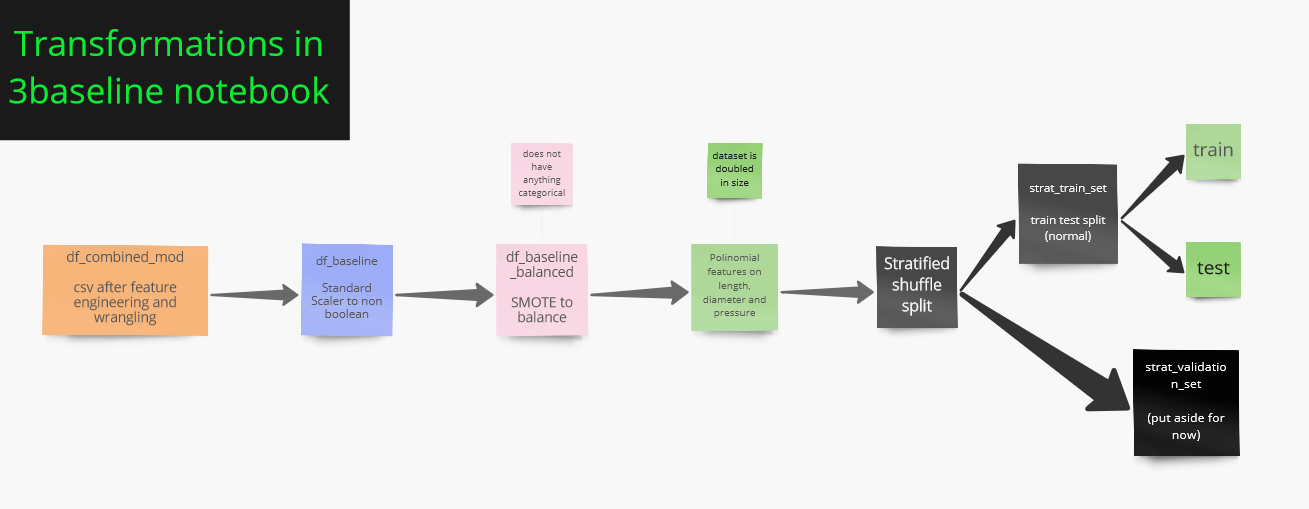

In [ ]:
#do a split in df_baseline_balanced to create a train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_baseline_balanced.drop(['Incidence'], axis=1), df_baseline_balanced['Incidence'], test_size=0.2, random_state=42)

#point to the folder where the data is stored
os.chdir(r"C:\Users\pedro\datathon\dataframes")

#store the train and test datasets in a folder
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)



# Baselines FROM HERE!!!!

## Random Forest Classifier

In [ ]:
#rfc using regularization and gridsearch to find the best parameters for the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

# define model
model = RandomForestClassifier()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['n_estimators'] = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
grid['max_depth'] = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
grid['min_samples_split'] = [2, 5, 10]
grid['min_samples_leaf'] = [1, 2, 4]
grid['max_features'] = ['auto', 'sqrt']
# define search
search = GridSearchCV(model, grid, scoring='roc_auc', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X_train, y_train)

# summarize
print('Best Score: %s' % results.best_score_)
print('Best Hyperparameters: %s' % results.best_params_)

In [ ]:
#random forest classifier on train set, predict target on train and test set and show accuracy scores using all cores

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_pred_train = rfc.predict(X_train)
print('Accuracy score for train set:',accuracy_score(y_train, rfc_pred_train))
print('Accuracy score for test set:',accuracy_score(y_test, rfc_pred))




In [ ]:
#test rfc in valiodation set
rfc_pred_val = rfc.predict(df_baseline_balanced.drop(['Incidence'], axis=1))
print('Accuracy score for validation set:',accuracy_score(df_baseline_balanced['Incidence'], rfc_pred_val))


In [ ]:
#crossvalidation on validation set
from sklearn.model_selection import cross_val_score
rfc_cv = cross_val_score(rfc, df_baseline_balanced.drop(['Incidence'], axis=1), df_baseline_balanced['Incidence'], cv=5)
print('Cross validation score:',rfc_cv.mean())


## Random Forest Classifier tuned
Goal is to avouid overfitting

In [ ]:
#rfc on train set using cross validation and predict target on train and test set and show accuracy scores using all cores
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=70, n_jobs=-1, random_state=42, max_depth=2, min_samples_leaf=8, min_samples_split=10, max_features=0.2)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_pred_train = rfc.predict(X_train)
print('Accuracy score for train set:',accuracy_score(y_train, rfc_pred_train))
print('Accuracy score for test set:',accuracy_score(y_test, rfc_pred))


In [ ]:

#do cross validation on train set
from sklearn.model_selection import cross_val_score
rfc_cv = cross_val_score(rfc, X_train, y_train, cv=5)
print('Cross validation score:',rfc_cv.mean())

#test rfc in valiodation set
rfc_pred_val = rfc.predict(strat_validation_set.drop(['Incidence'], axis=1))
print('Accuracy score for validation set:',accuracy_score(strat_validation_set['Incidence'], rfc_pred_val))

#crossvalidation on validation set
from sklearn.model_selection import cross_val_score 
rfc_cv = cross_val_score(rfc, strat_validation_set.drop(['Incidence'], axis=1), strat_validation_set['Incidence'], cv=5)    
print('Cross validation score:',rfc_cv.mean())

#rfc on train set using cross validation and predict target on train and test set and show accuracy scores using all cores
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=70, n_jobs=-1, random_state=42, max_depth=2, min_samples_leaf=8, min_samples_split=10, max_features=0.2)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_pred_train = rfc.predict(X_train)
print('Accuracy score for train set:',accuracy_score(y_train, rfc_pred_train))
print('Accuracy score for test set:',accuracy_score(y_test, rfc_pred))




In [ ]:
#rfc on train set, predict target on train and test set and show accuracy scores using all cores, increasing regularization parameter

from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(n_estimators=70, n_jobs=-1, random_state=42, max_depth=2, min_samples_leaf=8, min_samples_split=10, max_features=0.2)
rfc2.fit(X_train, y_train)
rfc2_pred = rfc2.predict(X_test)
rfc2_pred_train = rfc2.predict(X_train)
print('Accuracy score for train set:',accuracy_score(y_train, rfc2_pred_train))
print('Accuracy score for test set:',accuracy_score(y_test, rfc2_pred))


# The Graveyard

## Using Standard Scaler

In [ ]:
#Scaling data in df_baseline dataset except object columns and boolean values
cols_to_scale = ['Diameter', 'Length', 'Pressure', 'NumConnections','NumConnectionsUnder','Relative_Thickness', 'Age_of_Pipe_upon_inspection']
df_baseline[cols_to_scale] = StandardScaler().fit_transform(df_baseline[cols_to_scale])

df_baseline.head()


In [ ]:
#converting to absolute values 'NumConnections','NumConnectionsUnder','Relative_Thickness', 'Age_of_Pipe_upon_inspection'
df_baseline['NumConnections'] = df_baseline['NumConnections'].abs()
df_baseline['NumConnectionsUnder'] = df_baseline['NumConnectionsUnder'].abs()
df_baseline['Relative_Thickness'] = df_baseline['Relative_Thickness'].abs()
df_baseline['Age_of_Pipe_upon_inspection'] = df_baseline['Age_of_Pipe_upon_inspection'].abs()

df_baseline.head(1)

In [ ]:
#stratify Incidence variable to have a balanced dataset for the model
df_baseline['Incidence'].value_counts()

#split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(df_baseline.drop(['PipeId','Province', 'Town','Incidence'], axis=1), df_baseline['Incidence'], test_size=0.2, random_state=42, stratify=df_baseline['Incidence'])

#check the shape of the train and test datasets
X_train.shape
X_test.shape




In [ ]:
#use stratified shuffle split to split df_baseline_balanced into train and validation sets in a balanced way
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_baseline_balanced, df_baseline_balanced['Incidence']):
    strat_train_set = df_baseline_balanced.loc[train_index]
    strat_validation_set = df_baseline_balanced.loc[test_index]
strat_validation_set['Incidence'].value_counts()/len(strat_train_set)

strat_validation_set['Incidence'].value_counts()/len(strat_validation_set)

In [ ]:
#show the number of records for Incidence in each set
strat_train_set['Incidence'].value_counts()


In [ ]:
strat_validation_set['Incidence'].value_counts()
